# Dimensional Reduction

## Run following dimensional reduction algorithms for given fonts
1. Principal Component Analysis (PCA)
1. IsoMap
1. t-SNE

## Imports And Globals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

from importlib import reload
import font_utils.load_font as LF
import font_utils.upper_lower_numerals as ULN
import font_utils.char_classes as CHAR_CLASS

reload(LF)
reload(CHAR_CLASS)

<module 'font_utils.char_classes' from '/home/digital-tenebrist/ms-data-science/math-637/udel-math-637/utils/font_utils/char_classes.py'>

## Read Font
1. Returns dictionary for each variant with following fields
    1. df - pandas data frame with following trimming
        1. Retains m_label, and r0c0,...,r19c19 columns only
        1. No italic
        1. Only a-zA-Z0-9 returned
        1. Only min instances of each character based on min for a-zA-Z0-9
    1. min_char_count - number of instances of each character

In [2]:
lf = LF.LoadFont('garamond')
font_dict = lf.get_trimmed_font()
for k,v in font_dict.items():
    c=v['min_char_count']
    print(f'{k:25s} : {c}')

GARAMOND                  : 2


### Utility Methods

1. plot_pca(df,title)
1. plot_isomap(df,title)

#### plot_pca()

In [45]:
def plot_pca(raw, plot_title):
    
    np.set_printoptions(precision=4,floatmode='fixed')

    label_ar = [chr(x) for x in raw.m_label]

    df=raw.drop(columns=['m_label'])
    df=df-df.mean(axis=0)

    pca = PCA(n_components=20)
    pca.fit(df)

    print(f'Len of eigenvector {len(pca.components_[0])}')
    #print(f'First eigenvector')
    #print(f'{pca.components_[0]}')

    #print(f'First eigenvalue          : {pca.singular_values_[0]:0.4f}')
    print(f'Explained Variance Ratio  : {pca.explained_variance_ratio_[0]:0.4f}')
    print(f'Sum of explained variance : {sum(pca.explained_variance_ratio_)}')

    np.set_printoptions()

    x=df.dot(pca.components_[0])
    y=df.dot(pca.components_[1])

    print(f'Len label_ar {len(label_ar)}')
    print(f'Len x {len(x)}')
    print(f'Len y {len(y)}')

    plot_df = pd.DataFrame([np.array(label_ar).transpose(), x.transpose(), y.transpose()]).transpose()
    plot_df.columns=['m_label', 'x', 'y']

    char_class = CHAR_CLASS.CharClass()
    color_dict = char_class.get_color_map()
    plot_df['color'] = plot_df['m_label'].apply(lambda x: color_dict[x])

    plt.title(plot_title)
    plt.xlabel("Eigen 0")
    plt.ylabel("Eigen 1")
    plt.grid()

    plt.scatter(plot_df.x,plot_df.y, c=plot_df.color)
    
    # Larger Labeled Plot
    plt.figure(figsize=(15,15))
    sns.scatterplot(
        data=plot_df,
        x='x',
        y='y', 
        hue='color', 
        palette=['green', 'blue', 'red', 'orange']
    )

    for i in range(plot_df.shape[0]):
     plt.text(
         x=plot_df.x[i]+20,
         y=plot_df.y[i]+20,
         s=plot_df.m_label[i]#,
    #     fontdict=dict(color='red',size=10),
    #     bbox=dict(facecolor='yellow',alpha=0.5)
     )

    plt.title(plot_title)
    plt.xlabel('Eigen 0')
    plt.ylabel('Eigen 1')
    plt.grid()
    plt.show()

#### plot_isomap()

In [90]:
def plot_isomap(raw,plot_title):
    
    neighbors=8
    components=2
    
    np.set_printoptions(precision=4,floatmode='fixed')

    label_ar = [chr(x) for x in raw.m_label]

    df=raw.drop(columns=['m_label'])
    df=df-df.mean(axis=0)
    
    isomap = Isomap(n_neighbors=neighbors,n_components=components)
    y = isomap.fit_transform(df)

    y_df = pd.DataFrame([np.array(label_ar), y[:,0], y[:,1]]).transpose()
    y_df.columns=['m_label', 'x', 'y']

    char_class = CHAR_CLASS.CharClass()
    color_dict = char_class.get_color_map()
    y_df['color'] = y_df['m_label'].apply(lambda x: color_dict[x])

    plt.title(plot_title)
    plt.xlabel("Dim 0")
    plt.ylabel("Dim 1")
    plt.grid()

    plt.scatter(y_df.x,y_df.y, c=y_df.color)
    
    # Larger Labeled Plot
    plt.figure(figsize=(15,15))
    sns.scatterplot(
        data=y_df,
        x='x',
        y='y', 
        hue='color', 
        palette=['green', 'blue', 'red', 'orange']
    )

    for i in range(plot_df.shape[0]):
        plt.text(
            x=y_df.x[i]+20,
            y=y_df.y[i]+20,
            s=y_df.m_label[i]#,
    #     fontdict=dict(color='red',size=10),
    #     bbox=dict(facecolor='yellow',alpha=0.5)
        )

    plt.title(plot_title)
    plt.xlabel('Dim 0')
    plt.ylabel('Dim 1')
    plt.grid()
    plt.show()

#### plot_tsne()

In [93]:
def plot_tsne(raw,plot_title):
    
    components=2
    initializer='pca'
    rs=0
    
    np.set_printoptions(precision=4,floatmode='fixed')

    label_ar = [chr(x) for x in raw.m_label]

    df=raw.drop(columns=['m_label'])
    df=df-df.mean(axis=0)
    
    tsne = TSNE(n_components=components,init=initializer,random_state=rs)
    y = tsne.fit_transform(df)

    y_df = pd.DataFrame([np.array(label_ar), y[:,0], y[:,1]]).transpose()
    y_df.columns=['m_label', 'x', 'y']

    char_class = CHAR_CLASS.CharClass()
    color_dict = char_class.get_color_map()
    y_df['color'] = y_df['m_label'].apply(lambda x: color_dict[x])

    plt.title(plot_title)
    plt.xlabel("Dim 0")
    plt.ylabel("Dim 1")
    plt.grid()

    plt.scatter(y_df.x,y_df.y, c=y_df.color)
    
    # Larger Labeled Plot
    plt.figure(figsize=(15,15))
    sns.scatterplot(
        data=y_df,
        x='x',
        y='y', 
        hue='color', 
        palette=['green', 'blue', 'red', 'orange']
    )

    for i in range(plot_df.shape[0]):
        plt.text(
            x=y_df.x[i]+20,
            y=y_df.y[i]+20,
            s=y_df.m_label[i]#,
    #     fontdict=dict(color='red',size=10),
    #     bbox=dict(facecolor='yellow',alpha=0.5)
        )

    plt.title(plot_title)
    plt.xlabel('Dim 0')
    plt.ylabel('Dim 1')
    plt.grid()
    plt.show()

### Show Example Character

1. iloc=0 is the normal weight example
1. iloc=1 is the bold weight example

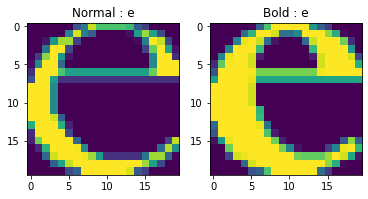

In [84]:
font_df = font_dict['GARAMOND']['df']
example_ltr = ord('e')

norm_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[0]
bold_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[1]

ltrs = [norm_ltr, bold_ltr]
caption_str = ['Normal', 'Bold']

ex_rows=1
ex_cols=2
ex_fig_size = [6,8]

# create figure (fig), and array of axes (ax)
ex_fig, ex_ax = plt.subplots(nrows=ex_rows, ncols=ex_cols, figsize=ex_fig_size)
for i, axi in enumerate(ex_ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    img = np.array(ltrs[i][1:], dtype=np.uint8).reshape(20,20)
    axi.imshow(img)
    # get indices of row/column
    # write row/col indices as axes' title for identification
    axi.set_title(f'{caption_str[i]} : {chr(ltrs[i][0])}')

plt.show()

### Create DataFrames

1. Raw DataFrame has multiple sets of characters
1. Garamond has 2 - normal/bold weight
1. Separate into DataFrames

In [38]:
uln = ULN.UpperLowerNumerals.get_ascii_codes()
norm_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[0] for x in uln])
bold_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[1] for x in uln])

## Perform PCA
1. Create PCA object based on given font
1. Create dataframe with x,y,char_label for each character
1. Create color map which labels similar characters together using knoweldge of fonts
1. Create scatter plot with given font and labels

### Normal Weight PCA

Len of eigenvector 400
Explained Variance Ratio  : 0.1524
Sum of explained variance : 0.8304975162873068
Len label_ar 62
Len x 62
Len y 62


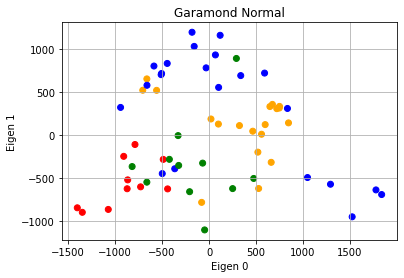

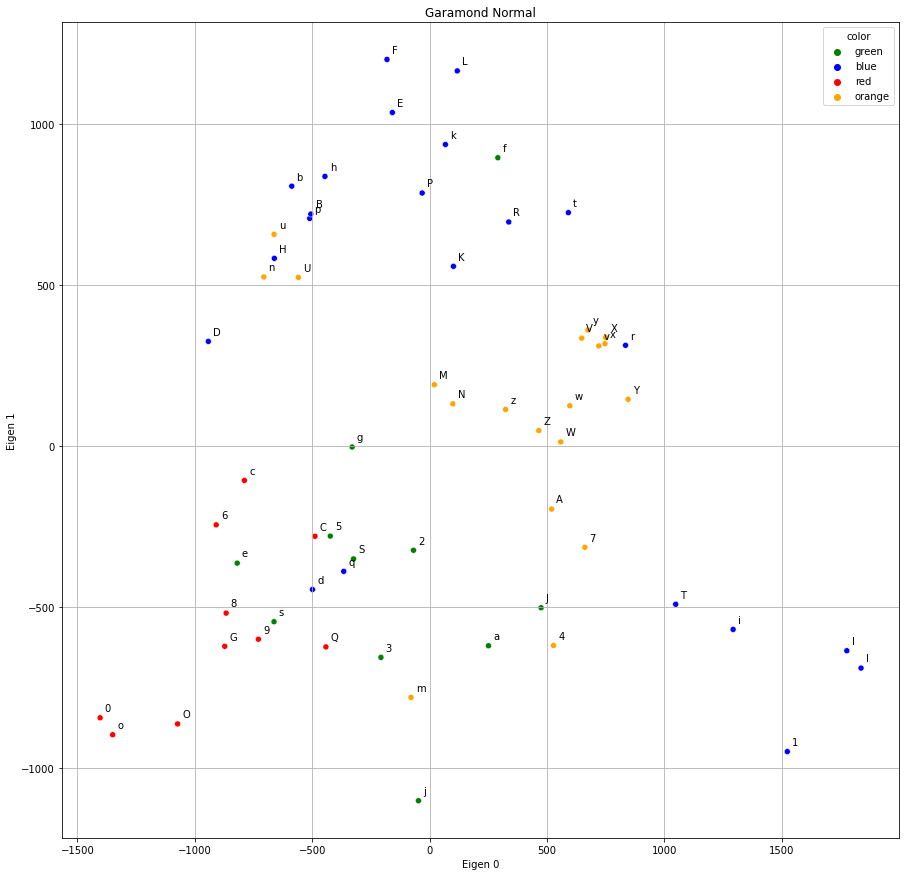

In [85]:
plot_pca(norm_df,'Garamond Normal')

### Bold Weight PCA

Len of eigenvector 400
Explained Variance Ratio  : 0.2047
Sum of explained variance : 0.8624789857192642
Len label_ar 62
Len x 62
Len y 62


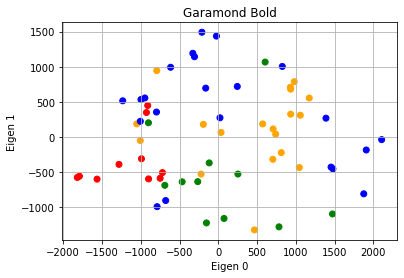

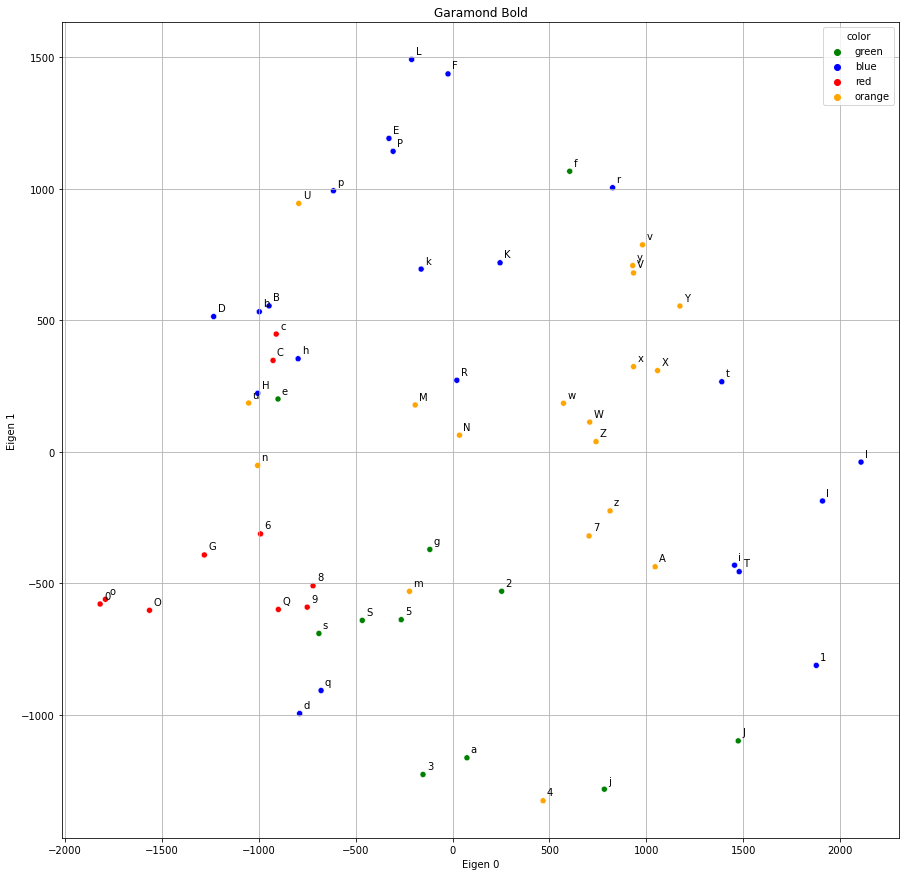

In [47]:
plot_pca(bold_df,'Garamond Bold')

#### To Print character/color/coordinates

In [33]:
for i in range(len(x)):
    char = plot_df.iloc[i]
    #print(f'{char[0]} : {char[3]} : ({char[1]:0.1f},{char[2]:0.1f})')

## Perform IsoMap
1. Create Isomap object on given font
1. Create dataframe with x,y,char_label for each character
1. Create color map which labels similar characters together using knoweldge of fonts
1. Create scatter plot with given font and labels

### Normal Weight IsoMap

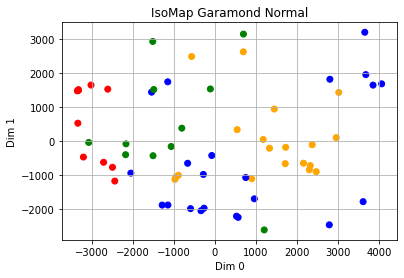

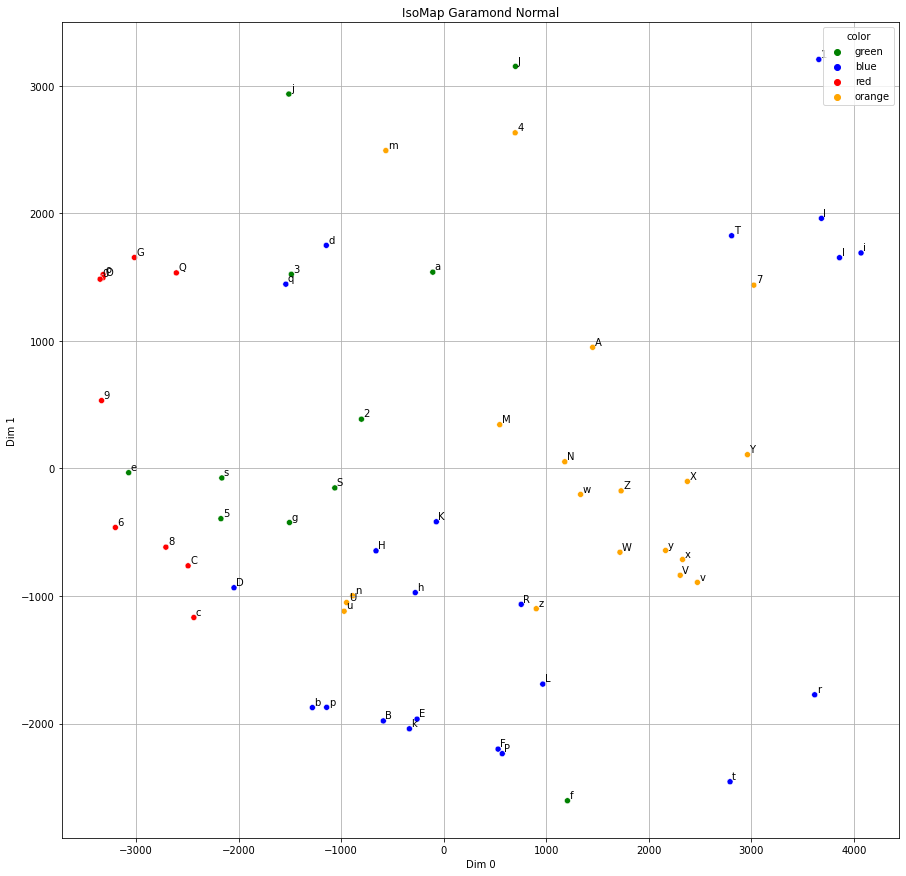

In [91]:
plot_isomap(norm_df,'IsoMap Garamond Normal')

### Bold Weight IsoMap

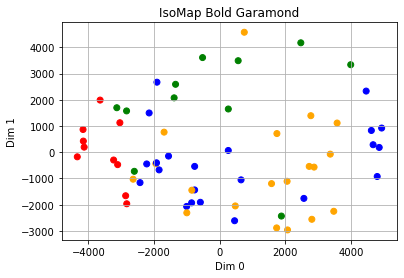

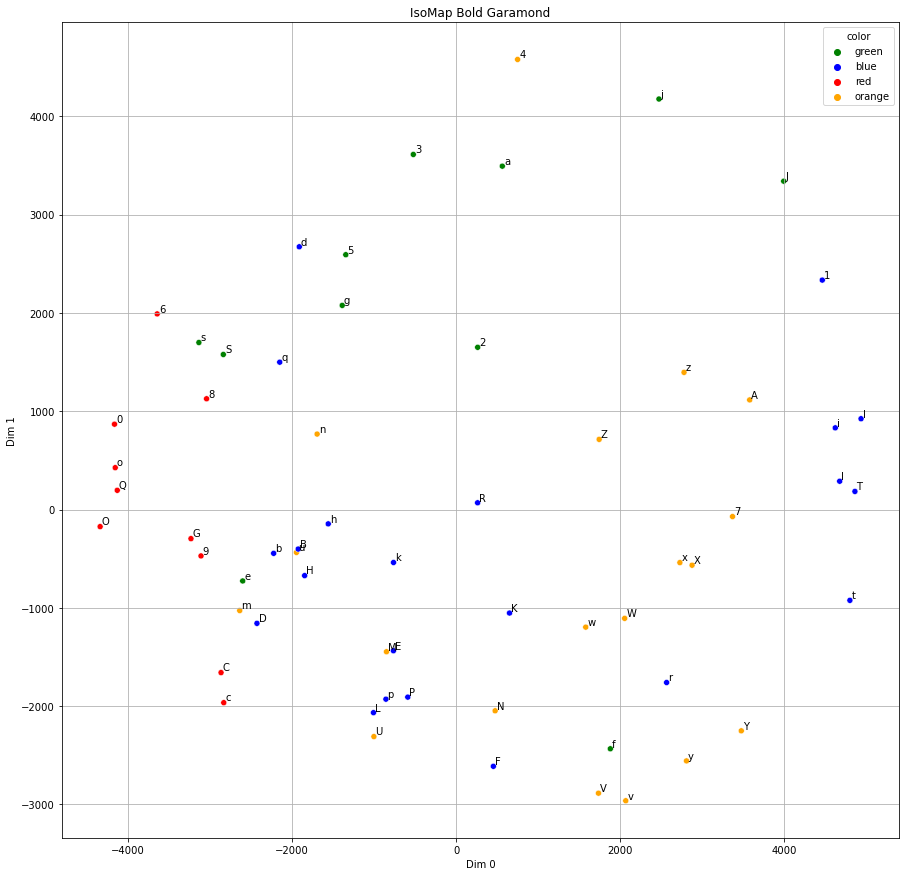

In [92]:
plot_isomap(bold_df, 'IsoMap Bold Garamond')

## Perform t-SNE
1. Create TSNE object on given font
1. Create dataframe with x,y,char_label for each character
1. Create color map which labels similar characters together using knoweldge of fonts
1. Create scatter plot with given font and labels

### Normal Weight TSNE

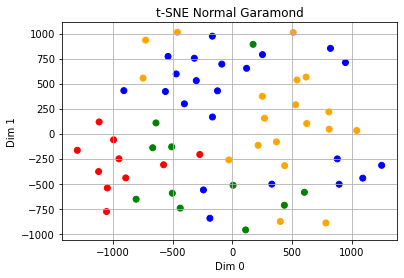

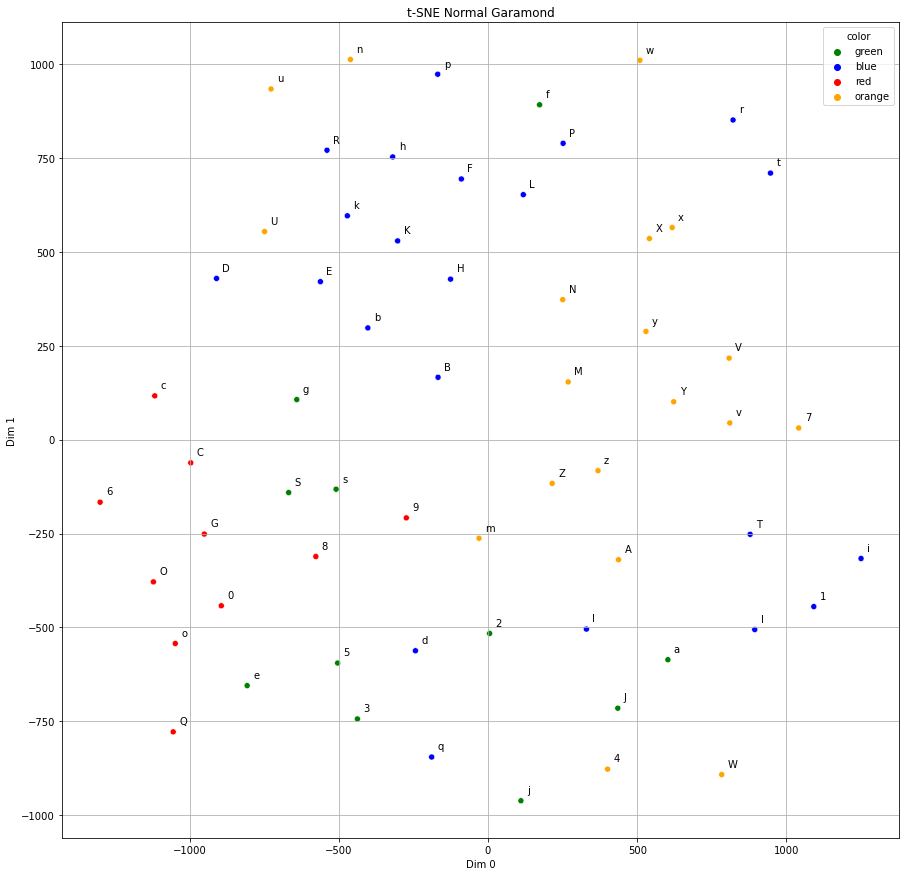

In [95]:
plot_tsne(norm_df,'t-SNE Normal Garamond')

### Bold Weight TSNE

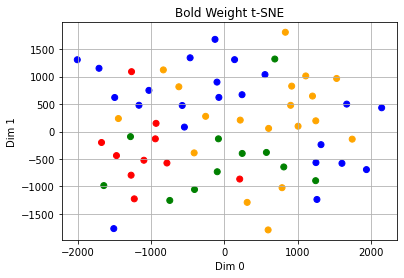

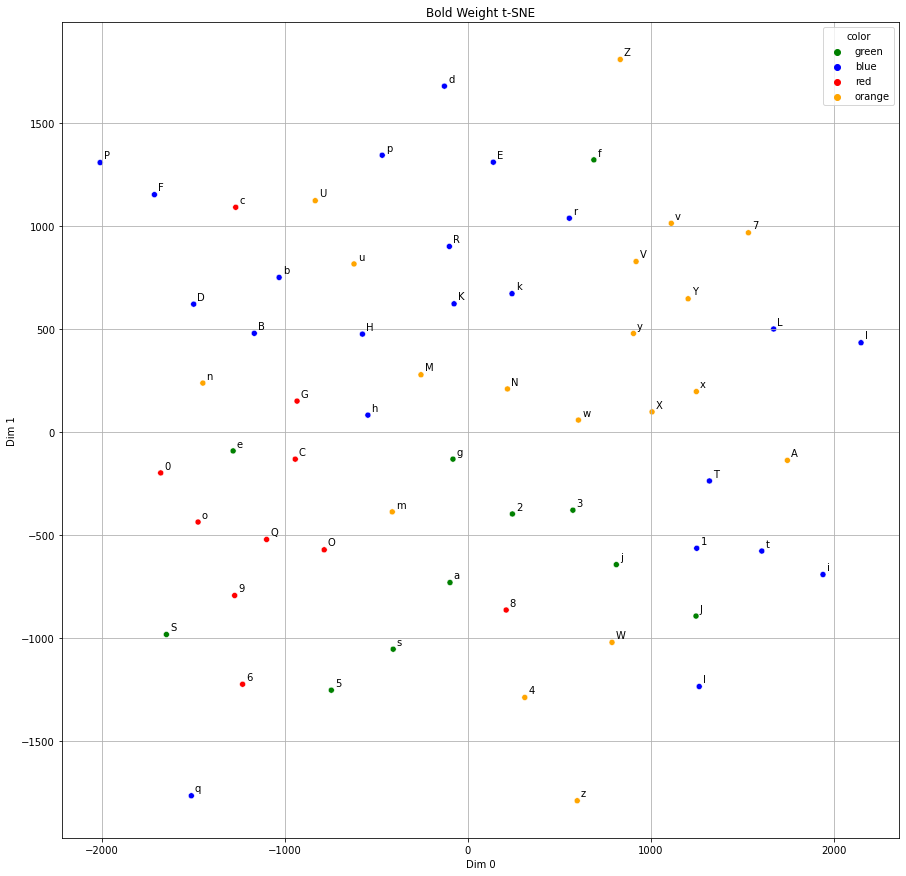

In [96]:
plot_tsne(bold_df,'Bold Weight t-SNE')